In [1]:
import matplotlib.pyplot as plt
import pandas.plotting as pd_plot
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rd = np.load('./proyecto_training_data.npy')
df = pd.DataFrame(rd, columns=['Salesprice','Overall Quality','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)

      Salesprice  Overall Quality  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0              7.0     856.0             8.0     2003.0   
1       181500.0              6.0    1262.0             6.0     1976.0   
2       223500.0              7.0     920.0             6.0     2001.0   
3       140000.0              7.0     961.0             7.0     1915.0   
4       250000.0              8.0    1145.0             9.0     2000.0   
...          ...              ...       ...             ...        ...   
1455    175000.0              6.0     953.0             7.0     1999.0   
1456    210000.0              6.0    2073.0             7.0     1978.0   
1457    266500.0              7.0    1188.0             9.0     1941.0   
1458    142125.0              5.0    1078.0             5.0     1950.0   
1459    147500.0              5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            60.0  
4          

In [3]:
df80 = df.iloc [0:int(0.8*len(df)),0:5]
df20 = df.iloc [int(0.8*len(df)):len(df),0:5]
#codigo para la informacion descriptiva
maxi=df.max()
print(maxi,min)
df80.describe()

Salesprice         755000.0
Overall Quality        10.0
1stFlrSF             4692.0
TotalRmsAbvGrd         14.0
YearBuilt            2010.0
LotFrontage           313.0
dtype: float64 <built-in function min>


,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199
std,78815.697902,1.378025,373.780374,1.609141,29.951707
min,34900.000000,1.000000,334.000000,2.000000,1875.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000


In [4]:
df80.describe()
rango = df80.max()-df80.min()
rango

Salesprice         720100.0
Overall Quality         9.0
1stFlrSF             2894.0
TotalRmsAbvGrd         12.0
YearBuilt             135.0
dtype: float64

In [5]:
corr_matrix = df.corr()
print(type(corr_matrix))

<class 'pandas.core.frame.DataFrame'>


In [6]:
corr_matrix

,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt,LotFrontage
Salesprice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
Overall Quality,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotalRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


In [7]:
corr_matrix.Salesprice

Salesprice         1.000000
Overall Quality    0.790982
1stFlrSF           0.605852
TotalRmsAbvGrd     0.533723
YearBuilt          0.522897
LotFrontage        0.351799
Name: Salesprice, dtype: float64

In [8]:
corr_matrix.Salesprice[1:]

Overall Quality    0.790982
1stFlrSF           0.605852
TotalRmsAbvGrd     0.533723
YearBuilt          0.522897
LotFrontage        0.351799
Name: Salesprice, dtype: float64

In [9]:
corr_matrix.Salesprice[1:].max()

0.7909816005838053

In [10]:
corr_matrix[corr_matrix.Salesprice==corr_matrix.Salesprice[1:].max()]

,Salesprice,Overall Quality,1stFlrSF,TotalRmsAbvGrd,YearBuilt,LotFrontage
Overall Quality,0.790982,1.0,0.476224,0.427452,0.572323,0.251646


In [11]:
corr_matrix[corr_matrix.Salesprice==corr_matrix.Salesprice[1:].max()].Salesprice

Overall Quality    0.790982
Name: Salesprice, dtype: float64

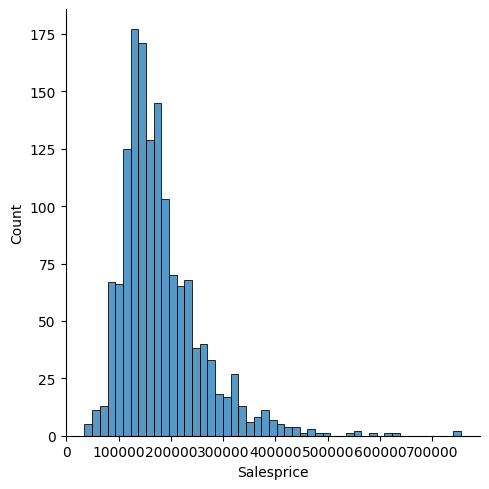

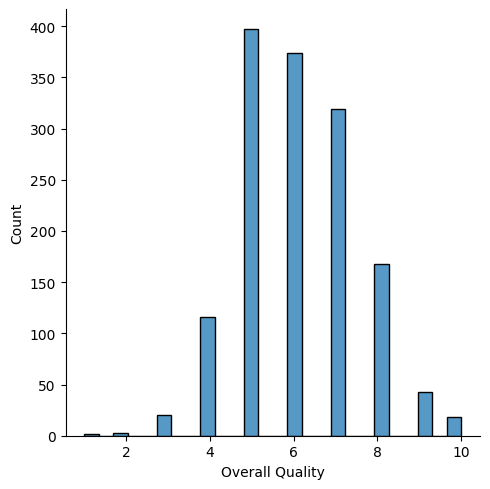

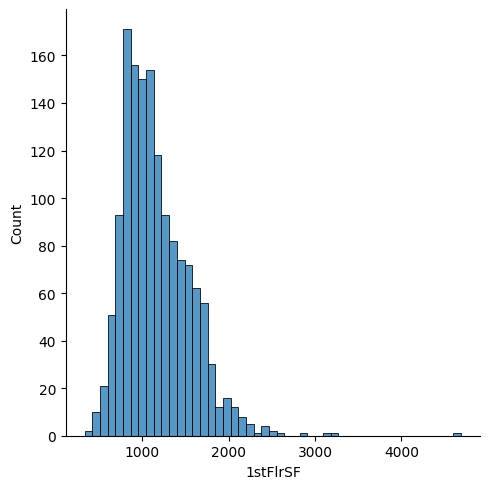

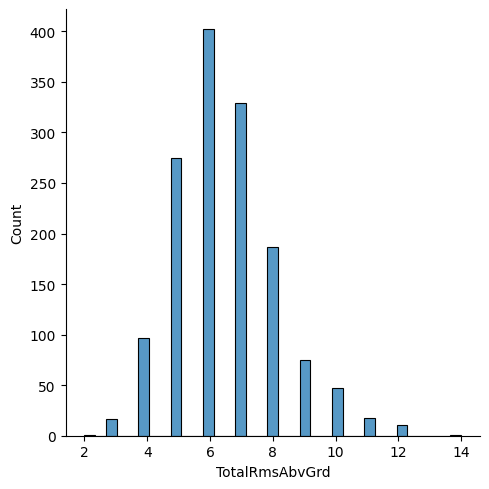

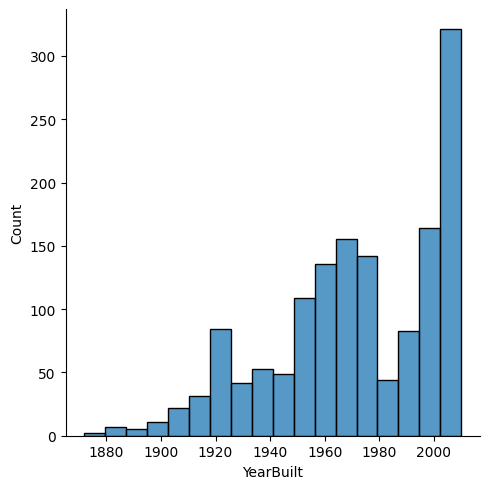

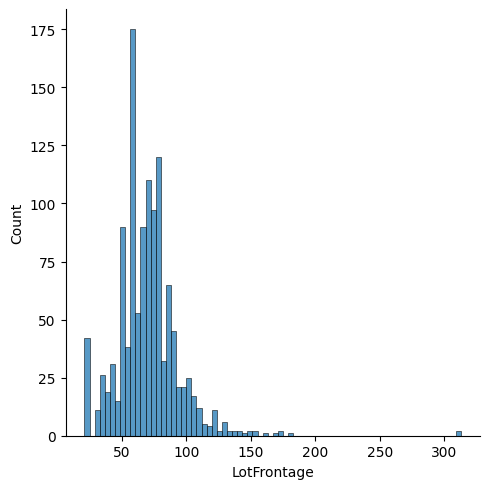

In [12]:
sns.displot(df.iloc[:,0])
sns.displot(df.iloc[:,1])
sns.displot(df.iloc[:,2])
sns.displot(df.iloc[:,3])
sns.displot(df.iloc[:,4])
sns.displot(df.iloc[:,5])

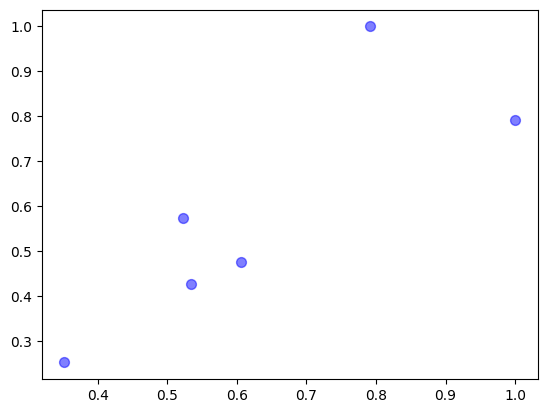

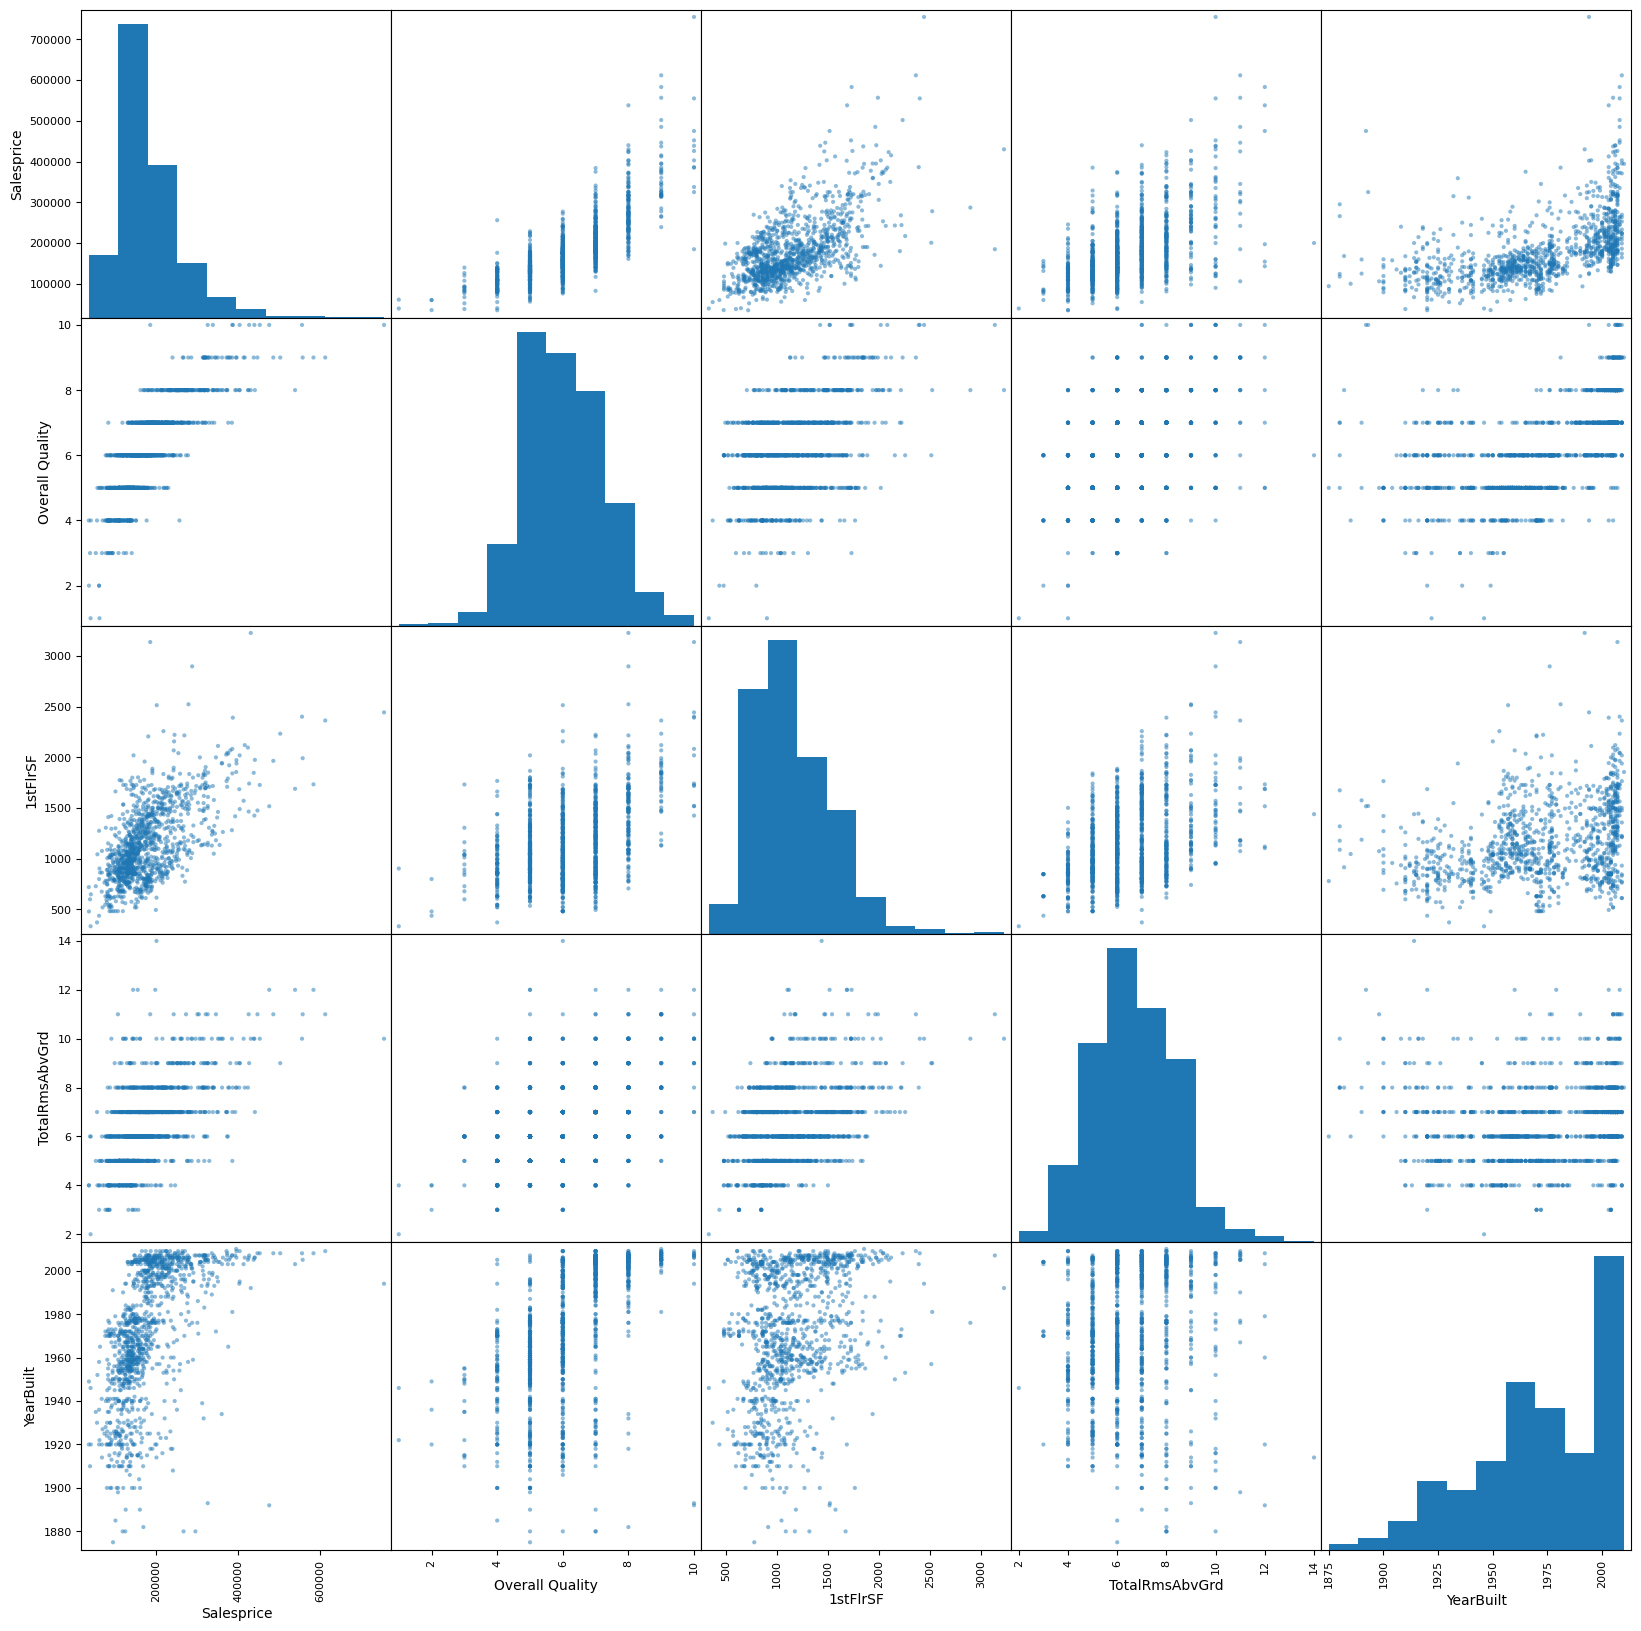

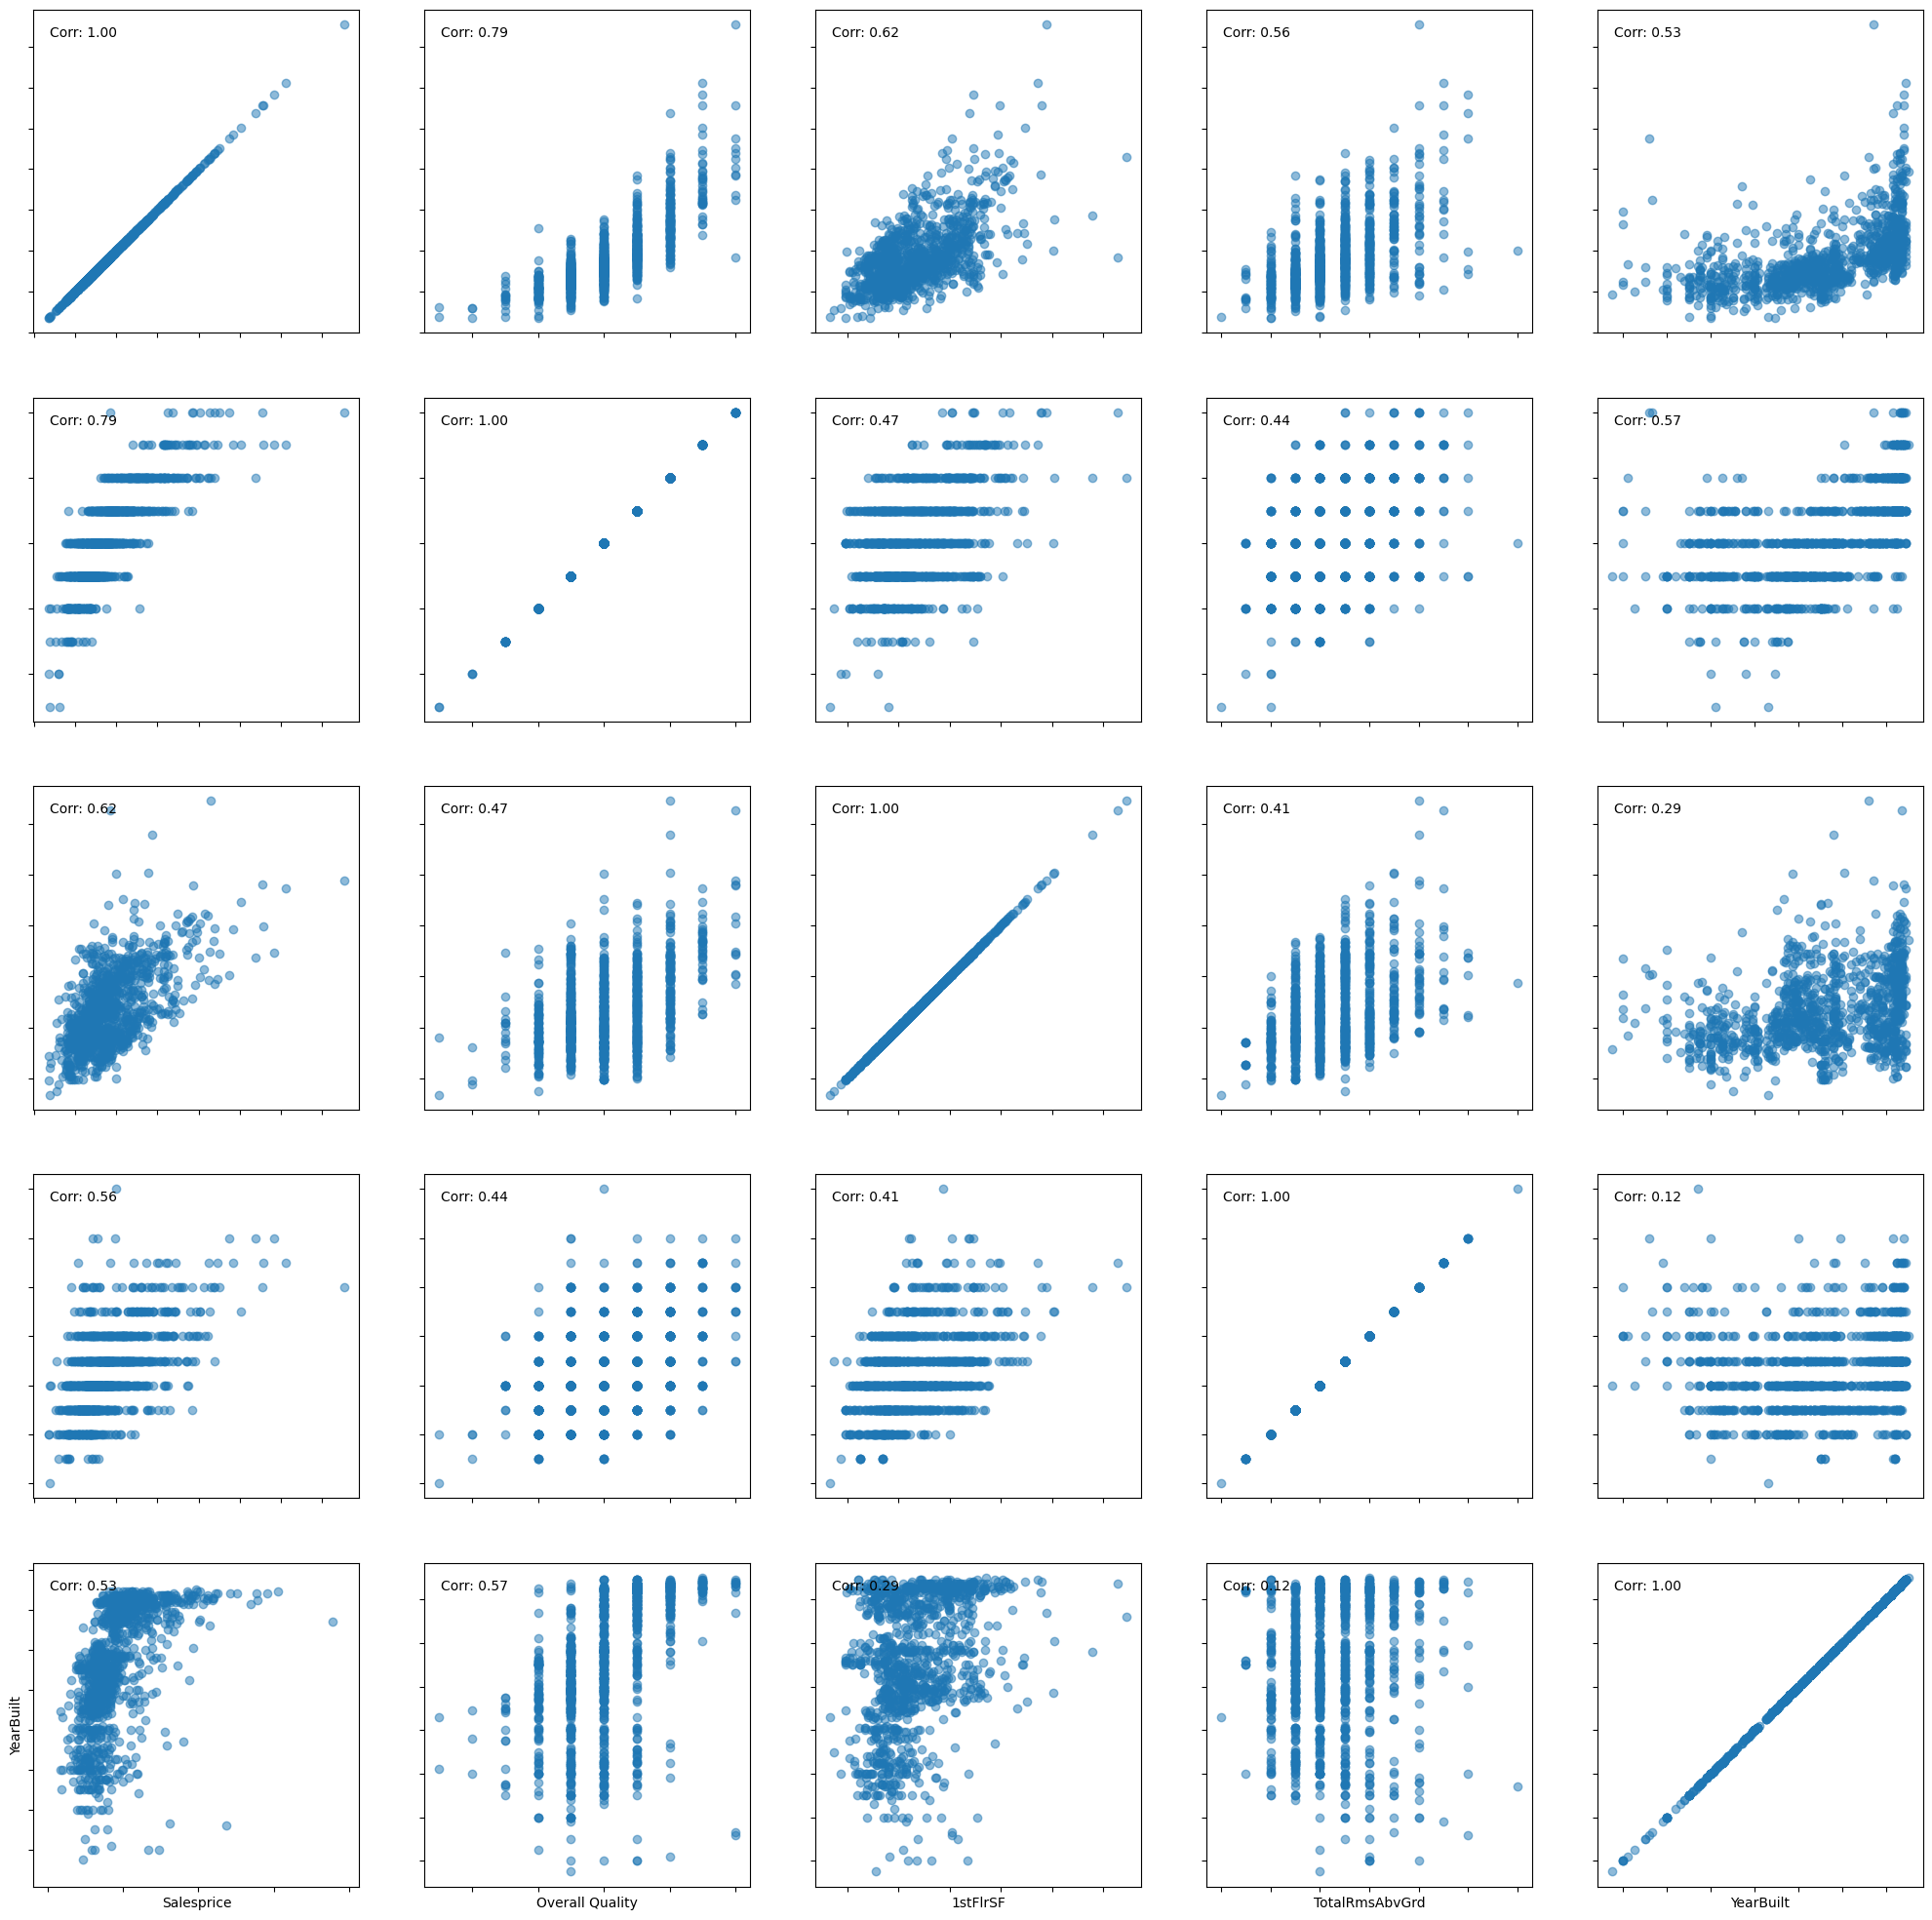

In [13]:
fig,ax = plt.subplots()
ax.scatter(corr_matrix.Salesprice, corr_matrix['Overall Quality'], s=50, c='blue', alpha=0.5)
plt.show()
ax.set_xlabel('Overall Qualilty')
ax.set_ylabel('Sales Price')
ax.set_title('Sales price vs Overall Quality')
pd_plot.scatter_matrix(df80, figsize=(20, 20))
plt.show()
# Crear los histogramas
fig, axs = plt.subplots(len(df80.columns), len(df80.columns), figsize=(25, 25))  
# Crear ciclo for 
for i in range(len(df80.columns)):     
    for j in range(len(df80.columns)):         
        # Graficos de dispersion e histogramas
                axs[i,j].scatter(df80[df80.columns[j]], df80[df80.columns[i]], alpha=0.5)         
                axs[i,j].xaxis.set_tick_params(labelbottom=False)         
                axs[i,j].yaxis.set_tick_params(labelleft=False)  
        # Correlacion calculada
                corrcoef = df80[df80.columns[j]].corr(df80[df80.columns[i]])
                axs[i,j].text(0.05, 0.95, f"Corr: {corrcoef:.2f}", transform=axs[i,j].transAxes,ha="left", va="top") 
                # Etiquetas en columnas         
                if i == len(df80.columns)-1:             
                    axs[i,j].set_xlabel(df80.columns[j])         
                    if j == 0:             
                        axs[i,j].set_ylabel(df80.columns[i])         
                        if i == 0 and j == 0:             
                            axs[i,j].set_title(df80.columns[j]) 
                                      # Ejes ajustados         
                        x_desc = df80[df80.columns[j]].describe()
                        y_desc = df80[df80.columns[i]].describe()
                        x_min, x_max = x_desc['min'], x_desc['max']
                        y_min, y_max = y_desc['min'], y_desc['max']
                        x_margin, y_margin = (x_max-x_min)*0.1, (y_max-y_min)*0.1
                        axs[i,j].set_xlim(x_min-x_margin, x_max+x_margin)
                        axs[i,j].set_ylim(y_min-y_margin, y_max+y_margin)
 
              
plt.show()

C:\Users\René\AppData\Local\Temp\ipykernel_16268\2987144244.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\René\AppData\Local\Temp\ipykernel_16268\2987144244.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(overq,sales,cmap='Greens',edgecolors='black',linewidths=1,alpha=0.75)


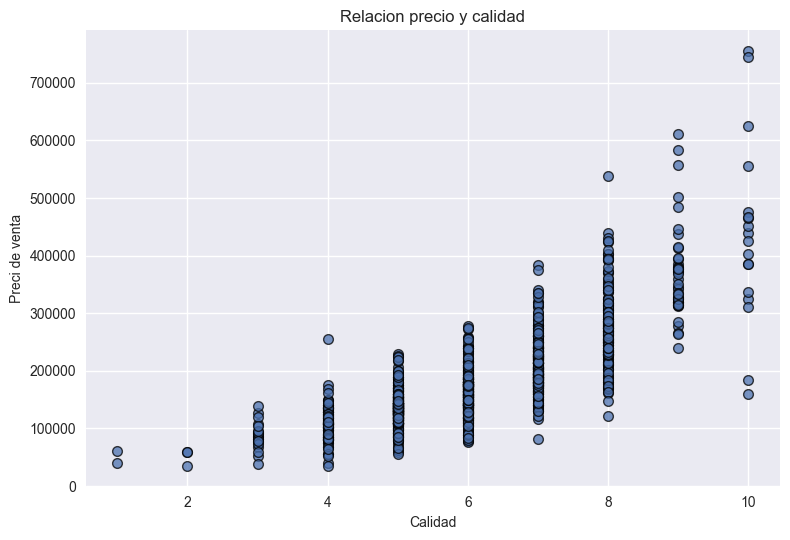

In [14]:
plt.style.use('seaborn')
sales = df['Salesprice']
overq = df['Overall Quality']
fi= df['1stFlrSF']
totalr  = df['TotalRmsAbvGrd']
yea = df['YearBuilt']
lo = df['LotFrontage']
plt.scatter(overq,sales,cmap='Greens',edgecolors='black',linewidths=1,alpha=0.75)
plt.xlabel('Calidad')
plt.ylabel('Preci de venta')
plt.title('Relacion precio y calidad')
plt.tight_layout()

Empezamos a declarar nuestro modelo de regresion

[[7. 1.]
 [6. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [8. 1.]
 [6. 1.]]
0 19409706561.942837
1 18983295716.86015
2 18567363698.630184
3 18161653164.35262
4 17765913091.100975
5 17379898620.713074
6 17003370908.393303
7 16636096975.032896
8 16277849563.157093
9 15928406996.409983
10 15587553042.490221
11 15255076779.45285
12 14930772465.294544
13 14614439410.741648
14 14305881855.162397
15 14004908845.526505
16 13711334118.337357
17 13424975984.463797
18 13145657216.800243
19 12873204940.685726
20 12607450527.0141
21 12348229487.969261
22 12095381375.321045
23 11848749681.21872
24 11608181741.42096
25 11373528640.902264
26 11144645121.777613
27 10921389493.488317
28 10703623545.193592
29 10491212460.313671
30 10284024733.171614
31 10081932087.682278
32 9884809398.03816
33 9692534611.343092
34 9504988672.145943
35 9322055448.827644
36 9143621661.796087
37 8969576813.444397
38 8799813119.829376
39 8634225444.027798
40 8472711231.129401
41 8315170444.826336
42 8161505505.559896
43 8011621230.186284
44

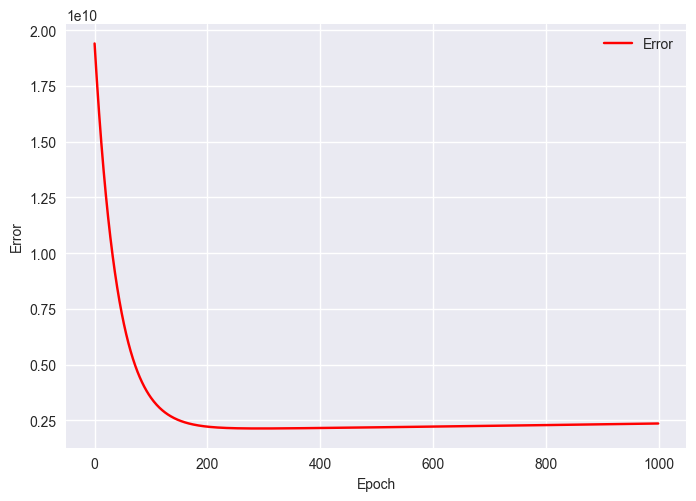

In [15]:
learning_rate = 0.001
epochs = 1000
b0 = 0.02
b1 = 0.01
x = df80["Overall Quality"].values
y = df80["Salesprice"].values
error_df = pd.DataFrame (columns=["Epoch", "Error",'b0','b1'])
x =pd.DataFrame(x)
ones = np.ones((x.shape[0], 1))
ones= pd.DataFrame(ones)
x = np.hstack((x,ones))
x = pd.DataFrame(x)
print(x.values)
for i in range (epochs):
    prediccion = np.dot(x.values,[b1,b0])
    error = prediccion-y
    error_medio =np.divide(np.sum(np.power(error,2)),np.multiply(2,len(error))) 
    b0 = b0-learning_rate*np.divide(np.sum(error*df80["Overall Quality"].values),len(error))
    b1 = b1-learning_rate*np.divide(np.sum(error),len(error))
    error_df = pd.concat([error_df, pd.DataFrame({"Epoch": [i], "Error": (error ** 2).mean()/2 ,'b0':b0,'b1':b1 })])
    print(i,error_medio)   
#predi = pd.DataFrame(prediccion)
#st=np.hstack((x,predi))
#st = pd.DataFrame(st)
#print(st)
#error_df = pd.DataFrame(error)
error_df.plot(x="Epoch", y="Error",color='red')
plt.xlabel("Epoch")
plt.ylabel("Error")
m=7
print(4071.106782+29204.812826*m)
#19409722051.630142

[[7. 1.]
 [6. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [8. 1.]
 [6. 1.]]
0 19409567140.736504
1 18983159675.164864
2 18567230953.436333
3 18161523634.689182
4 17765786697.985455
5 17379775287.10268
6 17003250559.137287
7 16635979536.826109
8 16277734964.49465
9 15928295167.543045
10 15587443915.382887
11 15254970287.740074
12 14930668544.241108
13 14614337997.202131
14 14305782887.542135
15 14004812263.74351
16 13711239863.785164
17 13424883999.975227
18 13145567446.612057
19 12873117330.404142
20 12607365023.581167
21 12348146039.63006
22 12095299931.591665
23 11848670192.855068
24 11608104160.3883
25 11373452920.345524
26 11144571215.992405
27 10921317357.892685
28 10703553136.300444
29 10491143735.703892
30 10283957651.46784
31 10081866608.523308
32 9884745482.053999
33 9692472220.130617
34 9504927768.245144
35 9321995995.698484
36 9143563623.795885
37 8969520155.805803
38 8799757808.638872
39 8634171446.204733
40 8472658514.405535
41 8315118977.725875
42 8161455257.3800535
43 8011572170.978278


69674.87477711249

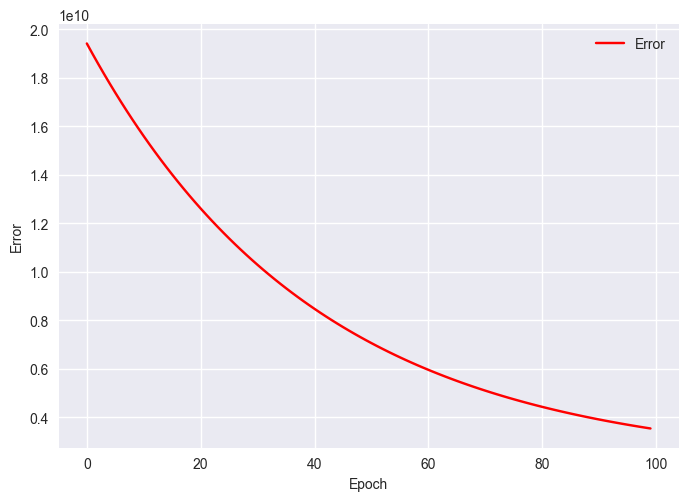

In [16]:
x = df80["Overall Quality"].values
y = df80["Salesprice"].values
def modeloml(df80,b0 =0.02,b1 =0.01,epochs = 100, learning_rate=0.001):
    x = df80["Overall Quality"].values
    y = df80["Salesprice"].values
    error_df = pd.DataFrame (columns=["Epoch", "Error",'b0','b1'])
    x =pd.DataFrame(x)
    ones = np.ones((x.shape[0], 1))
    ones= pd.DataFrame(ones)
    x = np.hstack((x,ones))
    x = pd.DataFrame(x)
    print(x.values)
    for i in range (epochs):
        prediccion = np.dot(x.values,[b1,b0])
        error = prediccion-y
        error_medio =np.divide(np.sum(np.power(error,2)),np.multiply(2,len(error))) 
        b0 = b0-learning_rate*np.divide(np.sum(error*df80["Overall Quality"].values),len(error))
        b1 = b1-learning_rate*np.divide(np.sum(error),len(error))
        error_df = pd.concat([error_df, pd.DataFrame({"Epoch": [i], "Error": (error ** 2).mean()/2 ,'b0':b0,'b1':b1 })])
        print(i,error_medio)
    return(error_df)       
#predi = pd.DataFrame(prediccion)
#st=np.hstack((x,predi))
#st = pd.DataFrame(st)
#print(st)
#error_df = pd.DataFrame(error)
modelo = modeloml(df80,b0 =0.2,b1 =0.1,epochs = 100, learning_rate=0.001) 
modelo.plot(x="Epoch", y="Error",color='red')
plt.xlabel("Epoch")
plt.ylabel("Error")
m=7
print(4071.106782+29204.812826*m)
modelo.to_csv("Modelo.csv",index=False)
Parametros = modelo.iloc[-1].to_dict()
Parametros
Parametros["b0"] 
#19409722051.630142

In [17]:
from regresion import regresion
objeto = regresion()
objeto.hola()

hola


In [18]:
learning_rate = 0.000001
epochs = 1000
b0 = 0.2
b1 = 0.1
x = df80["Overall Quality"].values
y = df80["Salesprice"].values
error_df = pd.DataFrame (columns=["Epoch", "Error"])
pd.DataFrame(x)
x =pd.DataFrame(x)
ones = np.ones((x.shape[0], 1))
ones= pd.DataFrame(ones)
x = np.hstack((x,ones))
x = pd.DataFrame(x)
x

,0,1
0,7.0,1.0
1,6.0,1.0
2,7.0,1.0
3,7.0,1.0
4,8.0,1.0
...,...,...
1163,4.0,1.0
1164,5.0,1.0
1165,7.0,1.0
1166,8.0,1.0


      Salesprice  Overall Quality  1stFlrSF  TotalRmsAbvGrd  YearBuilt  \
0       208500.0              7.0     856.0             8.0     2003.0   
1       181500.0              6.0    1262.0             6.0     1976.0   
2       223500.0              7.0     920.0             6.0     2001.0   
3       140000.0              7.0     961.0             7.0     1915.0   
4       250000.0              8.0    1145.0             9.0     2000.0   
...          ...              ...       ...             ...        ...   
1455    175000.0              6.0     953.0             7.0     1999.0   
1456    210000.0              6.0    2073.0             7.0     1978.0   
1457    266500.0              7.0    1188.0             9.0     1941.0   
1458    142125.0              5.0    1078.0             5.0     1950.0   
1459    147500.0              5.0    1256.0             6.0     1965.0   

      LotFrontage  
0            65.0  
1            80.0  
2            68.0  
3            60.0  
4          

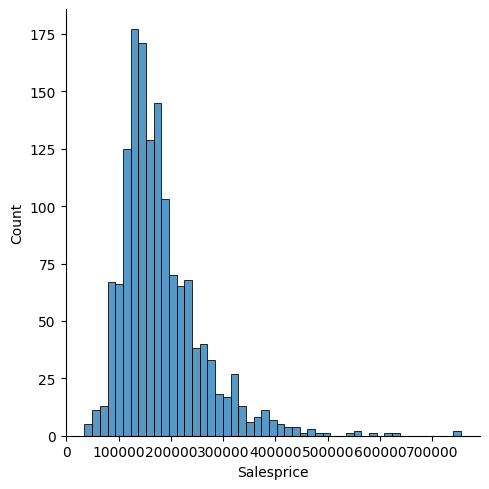

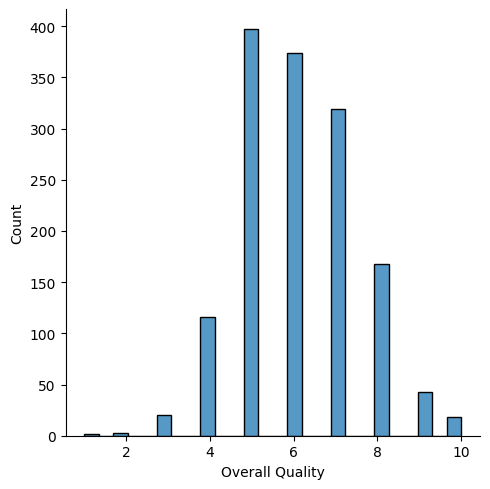

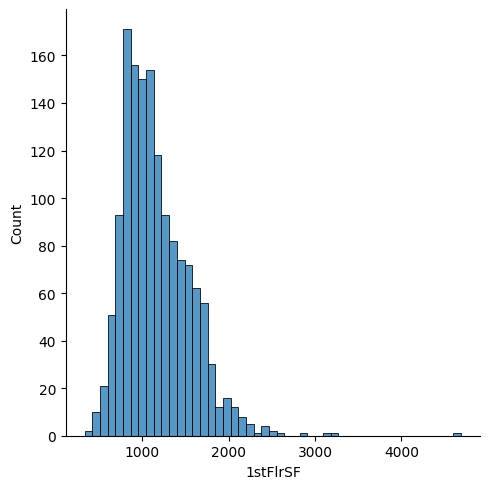

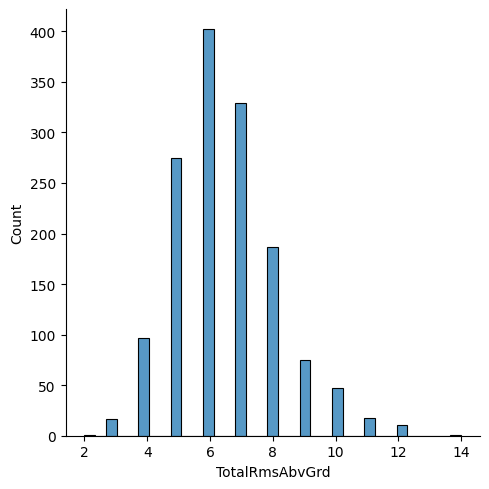

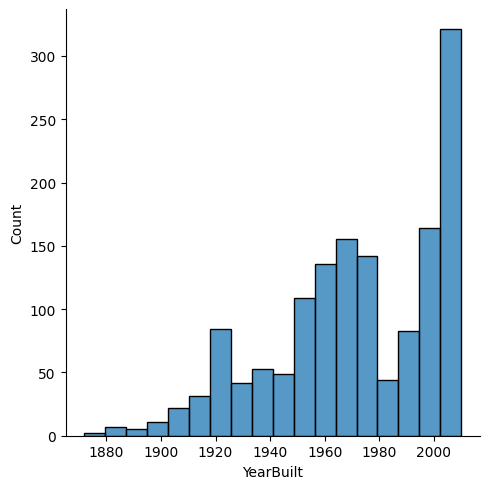

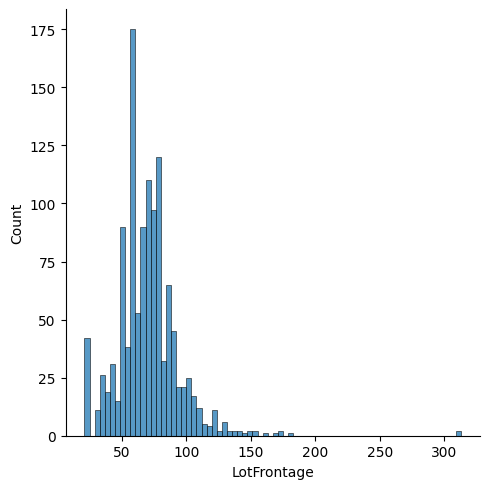

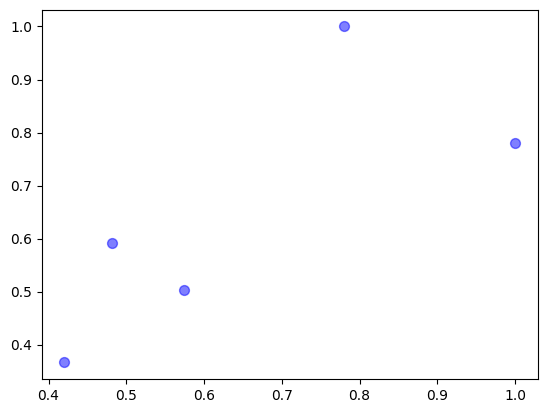

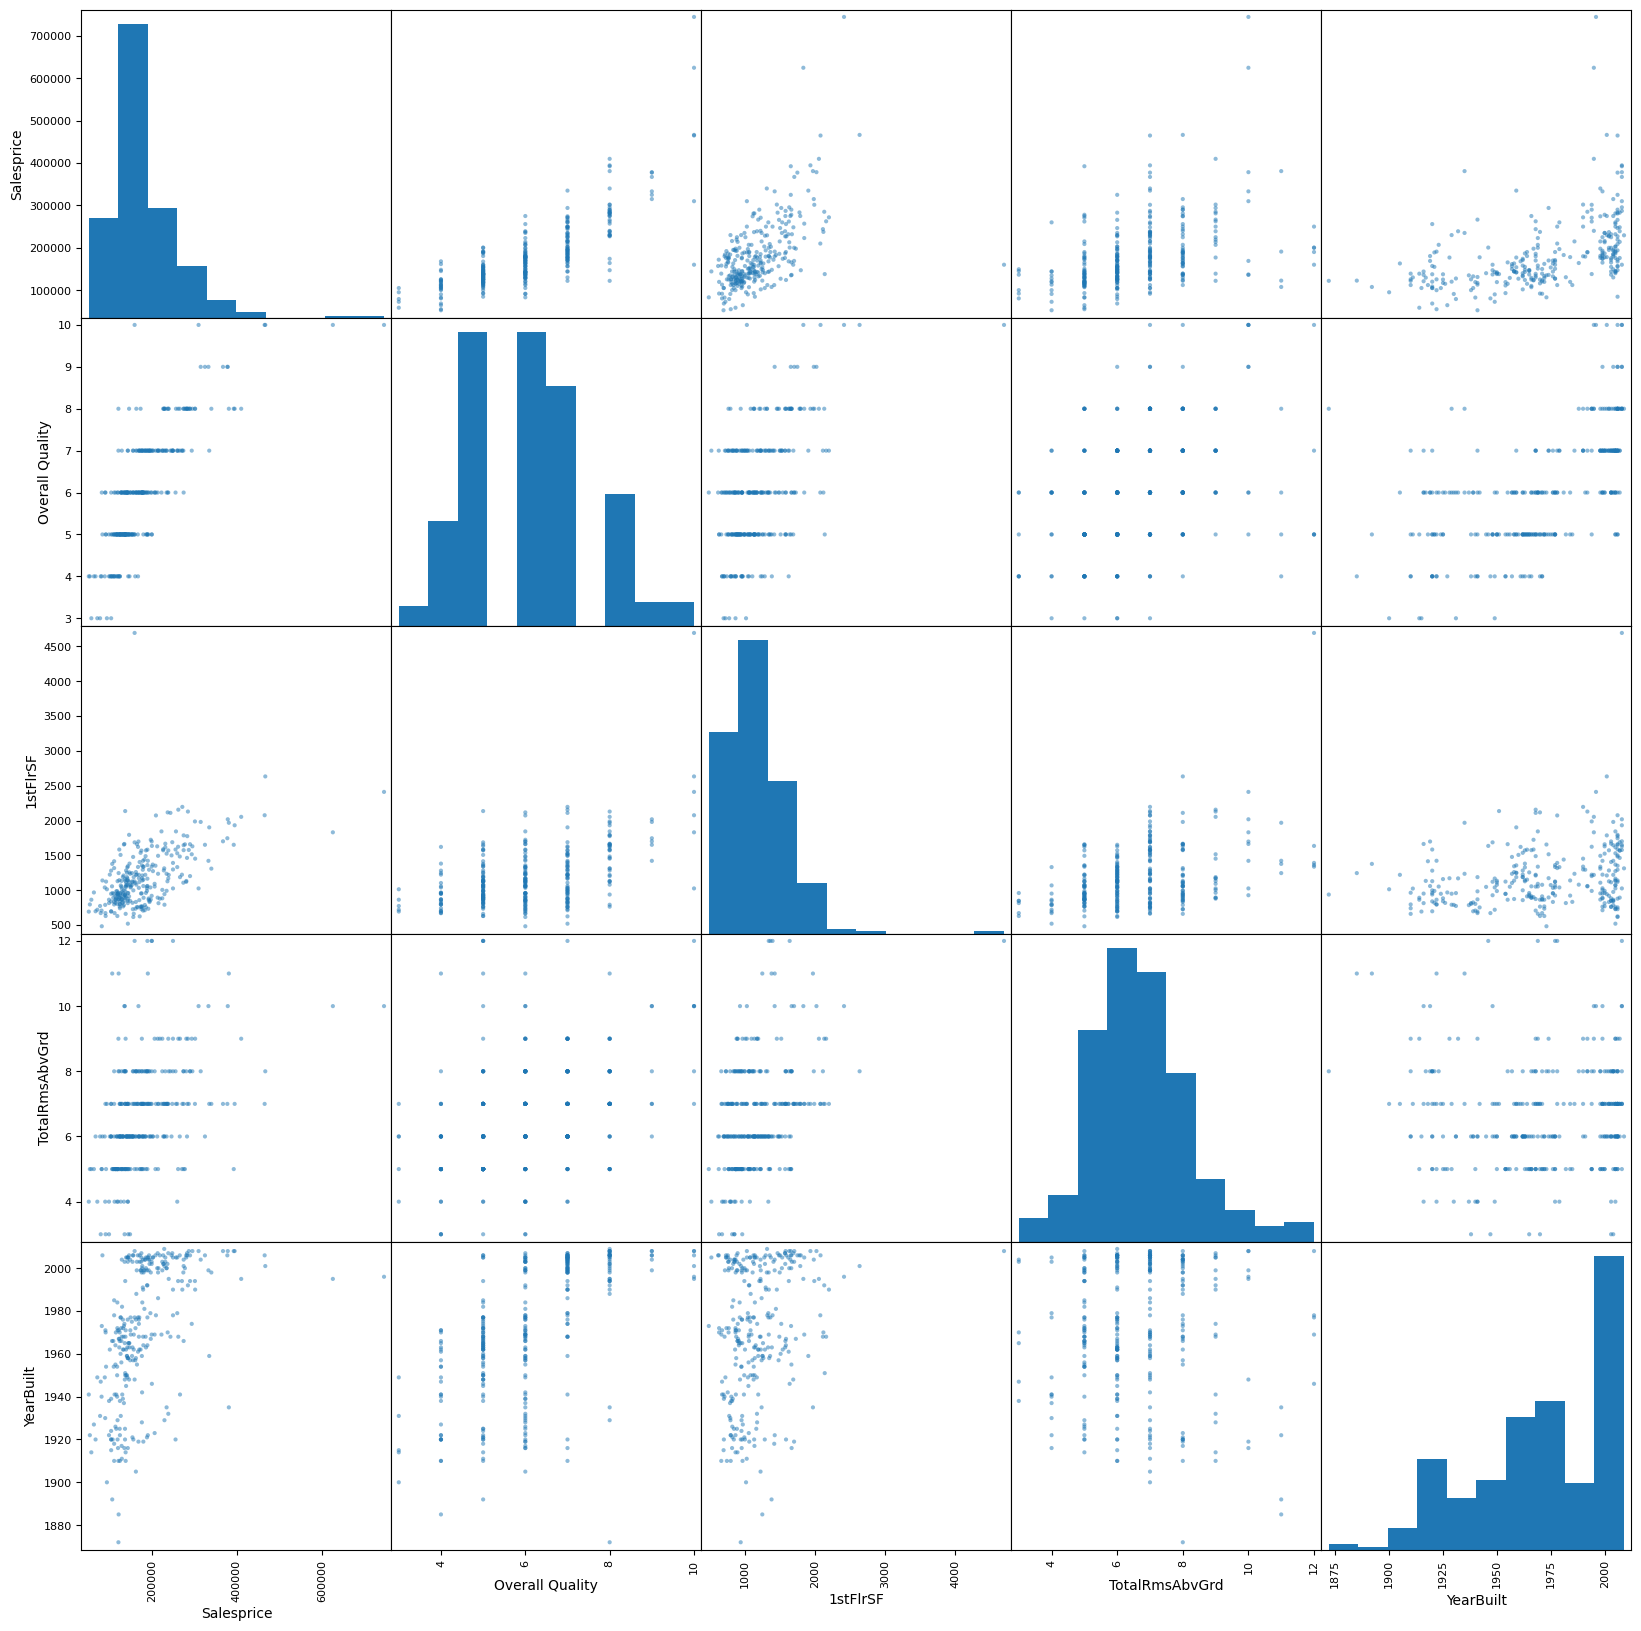

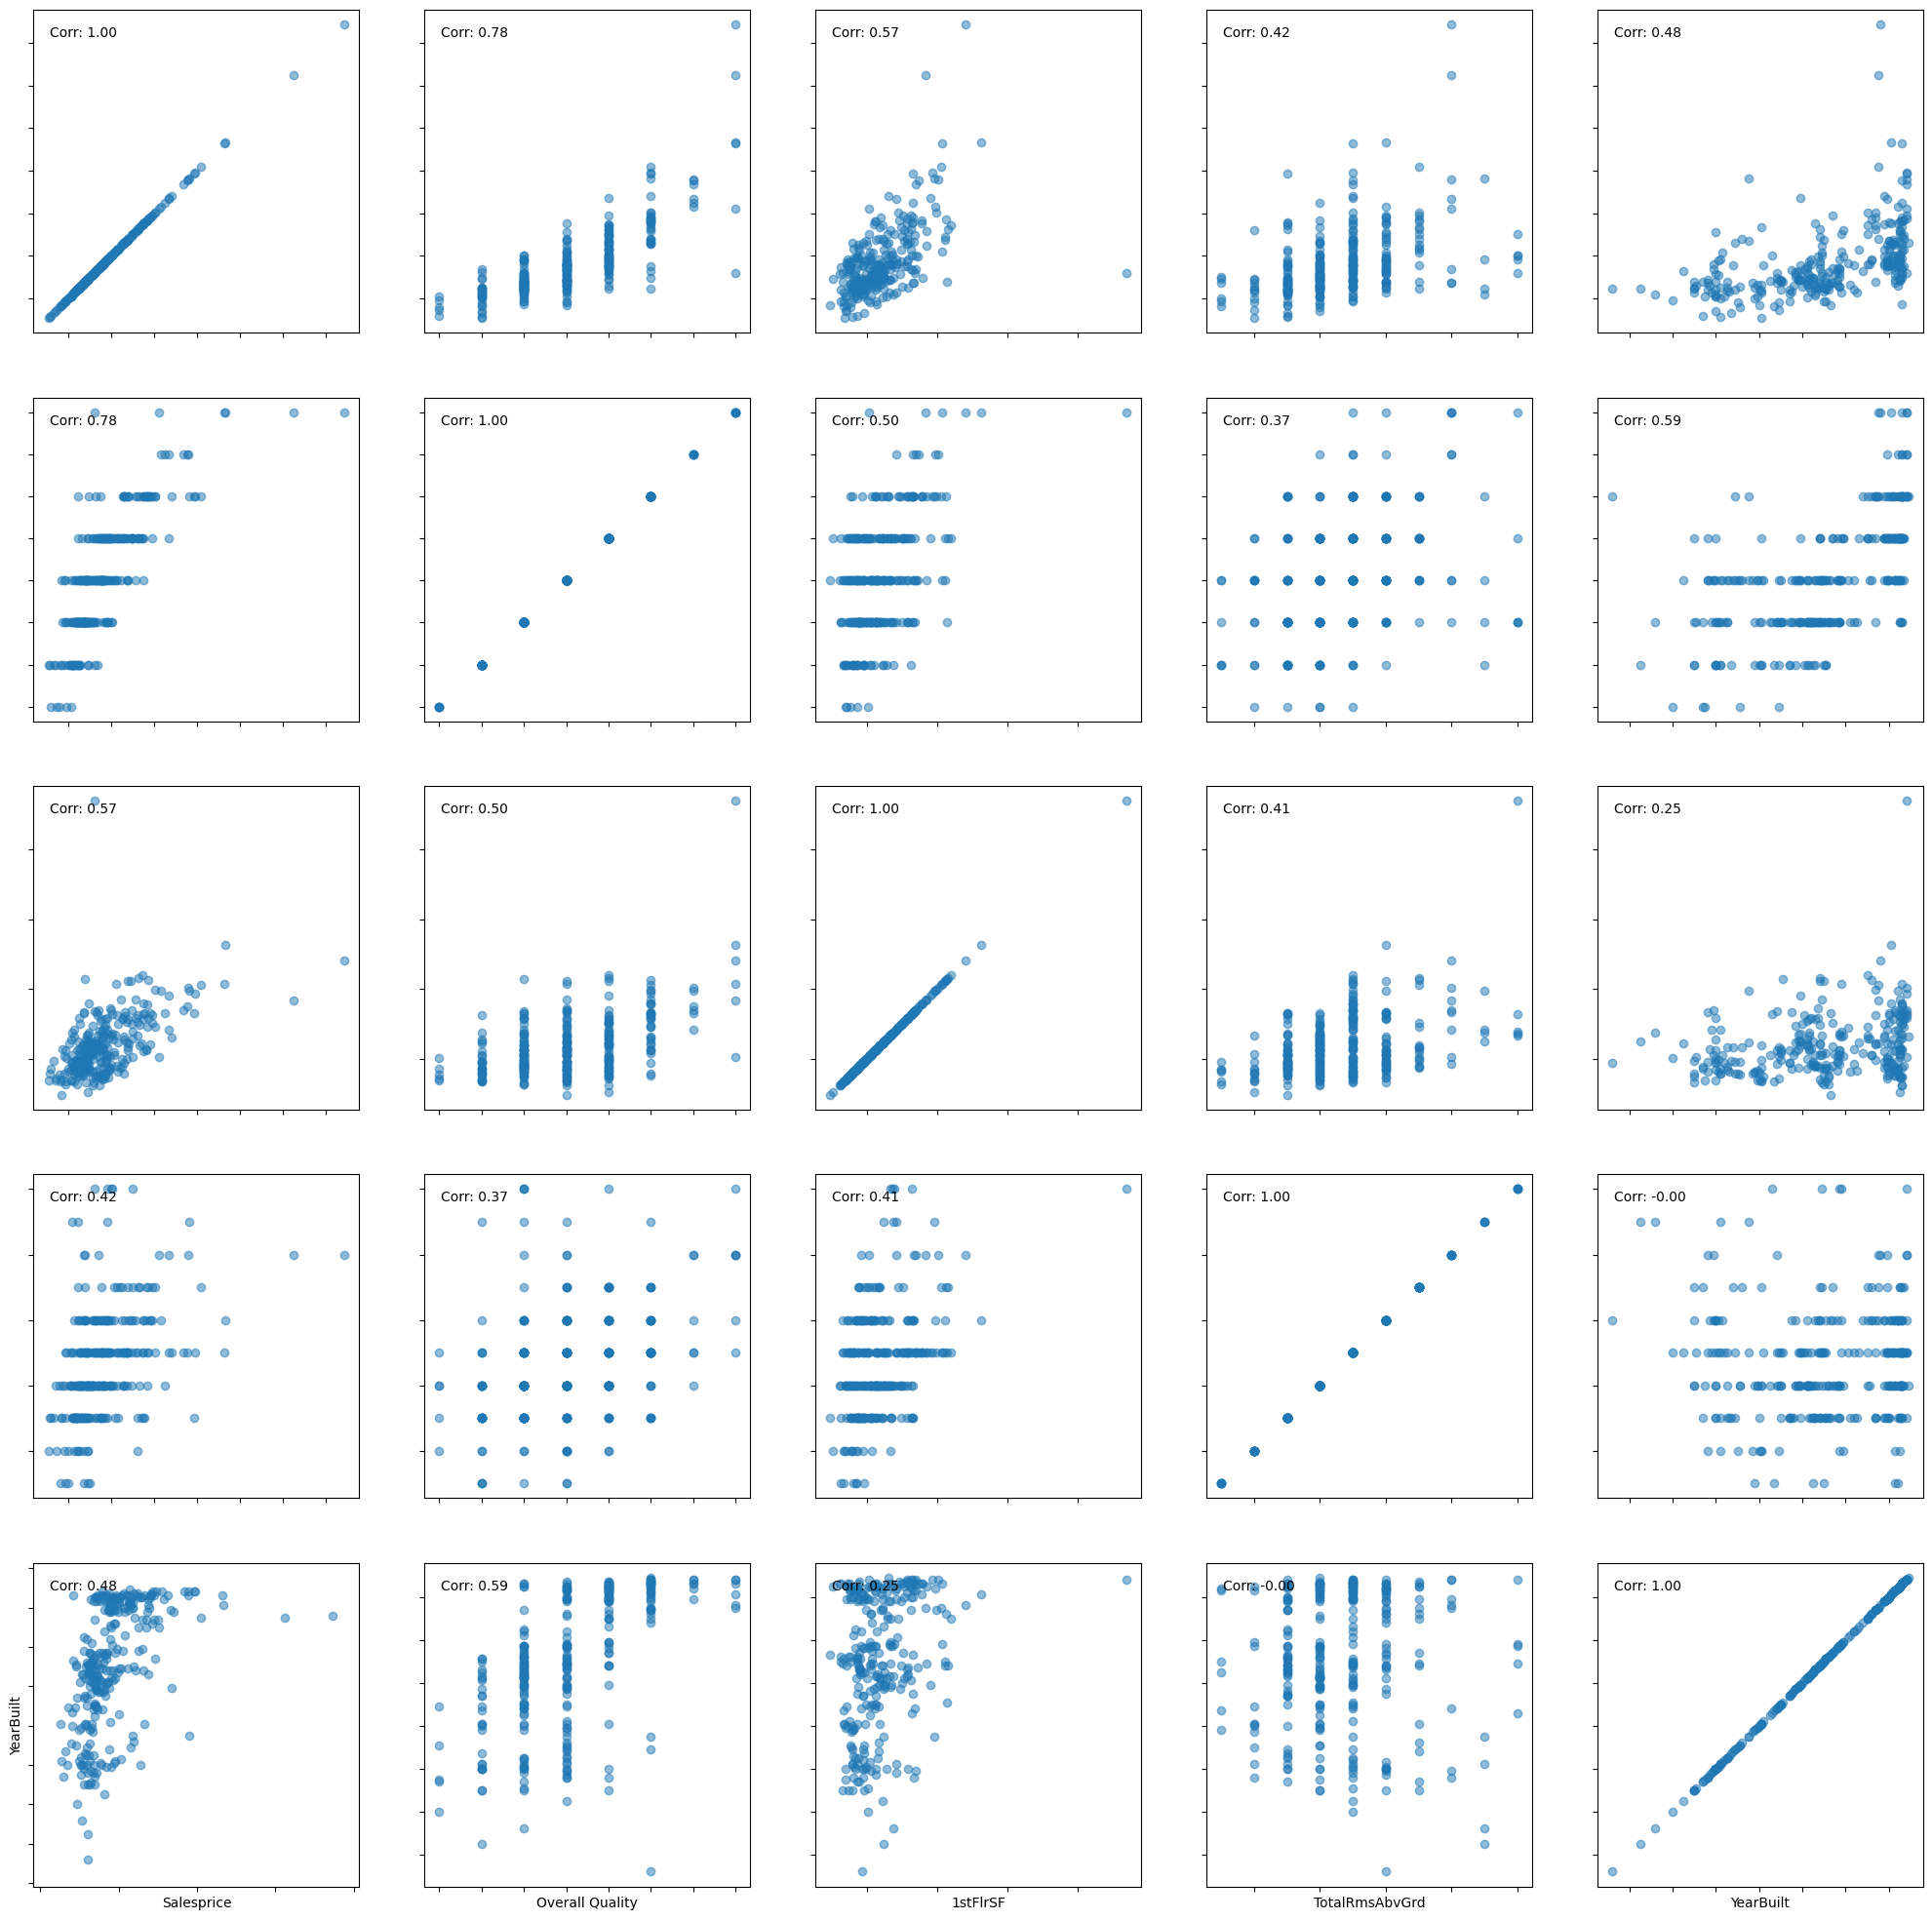

[[7. 1.]
 [6. 1.]
 [7. 1.]
 ...
 [7. 1.]
 [8. 1.]
 [6. 1.]]
0 19409706561.942837
1 18983295716.86015
2 18567363698.630184
3 18161653164.35262
4 17765913091.100975
5 17379898620.713074
6 17003370908.393303
7 16636096975.032896
8 16277849563.157093
9 15928406996.409983
10 15587553042.490221
11 15255076779.45285
12 14930772465.294544
13 14614439410.741648
14 14305881855.162397
15 14004908845.526505
16 13711334118.337357
17 13424975984.463797
18 13145657216.800243
19 12873204940.685726
20 12607450527.0141
21 12348229487.969261
22 12095381375.321045
23 11848749681.21872
24 11608181741.42096
25 11373528640.902264
26 11144645121.777613
27 10921389493.488317
28 10703623545.193592
29 10491212460.313671
30 10284024733.171614
31 10081932087.682278
32 9884809398.03816
33 9692534611.343092
34 9504988672.145943
35 9322055448.827644
36 9143621661.796087
37 8969576813.444397
38 8799813119.829376
39 8634225444.027798
40 8472711231.129401
41 8315170444.826336
42 8161505505.559896
43 8011621230.186284
44

,x,prediccion,y real,y real - y,porcentaje de error
1168,6.0,130865.921524,235000.0,104134.078476,0.443124
1169,10.0,171659.894506,625000.0,453340.105494,0.725344
1170,6.0,130865.921524,171000.0,40134.078476,0.234702
1171,6.0,130865.921524,163000.0,32134.078476,0.197142
1172,7.0,141064.414770,171900.0,30835.585230,0.179381
...,...,...,...,...,...
1455,6.0,130865.921524,175000.0,44134.078476,0.252195
1456,6.0,130865.921524,210000.0,79134.078476,0.376829
1457,7.0,141064.414770,266500.0,125435.585230,0.470678
1458,5.0,120667.428279,142125.0,21457.571721,0.150977


,x,prediccion,y real,y real - y,porcentaje de error
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,6.092466,131808.932886,182244.869863,50435.936977,0.182804
std,1.405076,14329.658120,82026.898202,71415.227824,0.259075
min,3.000000,100270.441788,52500.000000,-57968.935034,-1.104170
25%,5.000000,120667.428279,130000.000000,6521.201787,0.049863
50%,6.000000,130865.921524,163500.000000,34183.325098,0.203821
75%,7.000000,141064.414770,214250.000000,76409.831853,0.361601
max,10.000000,171659.894506,745000.000000,573340.105494,0.769584


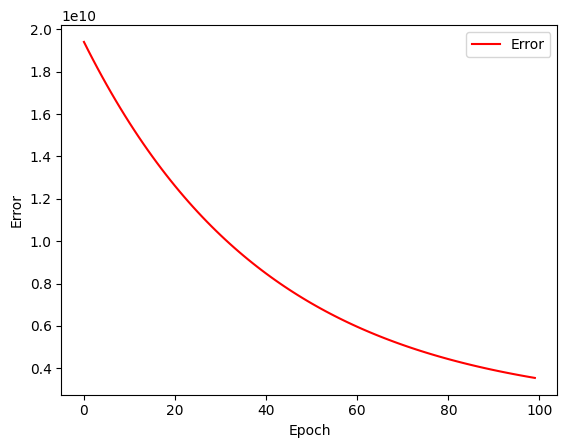

In [6]:
import matplotlib.pyplot as plt
import pandas.plotting as pd_plot
import numpy as np
import pandas as pd
import seaborn as sns

rd = np.load('./proyecto_training_data.npy')
df = pd.DataFrame(rd, columns=['Salesprice','Overall Quality','1stFlrSF','TotalRmsAbvGrd','YearBuilt','LotFrontage'])
print(df)
corr_matrix = df.corr()

from regresion import regresion
objeto = regresion()
df80,df20= objeto.separacion(df)
objeto.hola()
objeto.histogramas(df)
objeto.dispersion(df20)
mod = objeto.modeloml(df80)
Parametros = objeto.mode(mod)
Parametros
df_modelo,constantes = objeto.cargapd("./Modelo.csv")
print(df_modelo,constantes) 
objeto.proyecc(constantes,df20) 
datproyecc = objeto.proyecc(constantes,df20)
datproyecc ["y real"]= df20.Salesprice
datproyecc ["y real - y"]= df20.Salesprice - datproyecc.prediccion
datproyecc ["porcentaje de error"]= (df20.Salesprice - datproyecc.prediccion)/df20.Salesprice
display (datproyecc)
display (datproyecc.describe())

In [22]:
! git add .
! git commit -m "proyecto terminado con el uso de scikit y entrenamiento"
! git push

[main 065e43d] proyecto terminado con el uso de scikit y entrenamiento
 1 file changed, 588 insertions(+), 5 deletions(-)


To https://github.com/Senryo1/proyecto.git
   0f86d86..065e43d  main -> main


scikit-learn


In [8]:
! pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.4 MB 1.3 MB/s eta 0:00:07
     ---------------------------------------- 0.1/8.4 MB 656.4 kB/s eta 0:00:13
     ---------------------------------------- 0.1/8.4 MB 871.5 kB/s eta 0:00:10
      --------------------------------------- 0.2/8.4 MB 1.0 MB/s eta 0:00:08
     - -------------------------------------- 0.3/8.4 MB 1.2 MB/s eta 0:00:07
     - -------------------------------------- 0.4/8.4 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/8.4 MB 1.8 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/8.4 MB 2.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/8.4 MB 2.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.2/8.4 MB 2.6 MB/s eta 0:00:03
     ------- -------------------------------- 1.6/8.4 MB 3.0 MB/s eta 0:00:03
     -------- ------------------------------- 1.9/8.4 MB 3.3 MB/s e

In [27]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=100, tol=0.001, alpha=0.01, learning_rate='constant', eta0=0.02)
X = df80["Overall Quality"].values.reshape((-1, 1))    
y = df80["Salesprice"].values
history = model.fit(X, y)
x_20 = df20["Overall Quality"].values.reshape((-1, 1))
y_20 = model.predict(x_20)
datproyecc["scikit"] = y_20
datproyecc
datproyecc["y real - sckikit"] = datproyecc["y real"] - y_20
datproyecc["porcentaje error scikit"] = (datproyecc["y real"] - y_20)/datproyecc["y real"]
display(datproyecc.describe())
display(datproyecc)
history.get_params(deep=True)
display(history.get_params(deep=True))
display({'Epoch': history.n_iter_,
 'b0': history.intercept_[0],
 'b1': history.coef_[0]})

,x,prediccion,y real,y real - y,porcentaje de error,scikit,y real - sckikit,porcentaje error scikit
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,6.092466,131808.932886,182244.869863,50435.936977,0.182804,205773.344339,-23528.474476,-0.185314
std,1.405076,14329.658120,82026.898202,71415.227824,0.259075,70210.741905,51709.056668,0.311881
min,3.000000,100270.441788,52500.000000,-57968.935034,-1.104170,51244.824542,-241030.311215,-1.506439
25%,5.000000,120667.428279,130000.000000,6521.201787,0.049863,151183.535020,-56122.245498,-0.322871
50%,6.000000,130865.921524,163500.000000,34183.325098,0.203821,201152.890259,-23652.890259,-0.136457
75%,7.000000,141064.414770,214250.000000,76409.831853,0.361601,251122.245498,-410.551449,-0.003028
max,10.000000,171659.894506,745000.000000,573340.105494,0.769584,401030.311215,343969.688785,0.511954


,x,prediccion,y real,y real - y,porcentaje de error,scikit,y real - sckikit,porcentaje error scikit
1168,6.0,130865.921524,235000.0,104134.078476,0.443124,201152.890259,33847.109741,0.144030
1169,10.0,171659.894506,625000.0,453340.105494,0.725344,401030.311215,223969.688785,0.358352
1170,6.0,130865.921524,171000.0,40134.078476,0.234702,201152.890259,-30152.890259,-0.176333
1171,6.0,130865.921524,163000.0,32134.078476,0.197142,201152.890259,-38152.890259,-0.234067
1172,7.0,141064.414770,171900.0,30835.585230,0.179381,251122.245498,-79222.245498,-0.460862
...,...,...,...,...,...,...,...,...
1455,6.0,130865.921524,175000.0,44134.078476,0.252195,201152.890259,-26152.890259,-0.149445
1456,6.0,130865.921524,210000.0,79134.078476,0.376829,201152.890259,8847.109741,0.042129
1457,7.0,141064.414770,266500.0,125435.585230,0.470678,251122.245498,15377.754502,0.057703
1458,5.0,120667.428279,142125.0,21457.571721,0.150977,151183.535020,-9058.535020,-0.063736


{'alpha': 0.01,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.02,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_error',
 'max_iter': 100,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'Epoch': 12, 'b0': -98663.24117522636, 'b1': 49969.355239059914}